In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [108]:
X = [0, 5,15,16,17,18,19,20,21,22,23,24, 40]
Y = [8.11, 11.00, 8.20, 8.30, 9.40, 9.30, 9.60, 10.30, 11.30, 11.40, 12.20, 12.90, 13.2]

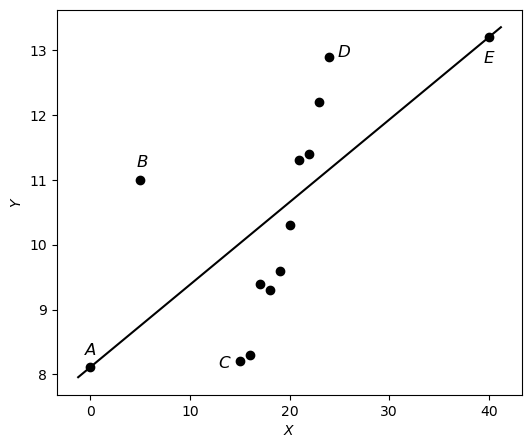

In [109]:
plt.figure(figsize=(6,5))
plt.scatter(X, Y, color = 'black')

# 대각선 길이를 살짝 확장
x_min, x_max = min(X), max(X)
y_min, y_max = min(Y), max(Y)

x_pad = (x_max - x_min) * 0.03
y_pad = (y_max - y_min) * 0.03
plt.plot([x_min - x_pad, x_max + x_pad],
         [y_min - y_pad, y_max + y_pad],
         linestyle='-', color = 'black')

plt.xlim()
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.xticks(range(0, 41, 10))
plt.yticks(range(8, 14, 1))
 
for x, y in zip(X, Y):
    if x == 0:
        plt.text(x, y+0.2, '$A$',  fontsize=12, ha='center')
    elif x == 5:
        plt.text(x+0.2, y+0.2, '$B$', fontsize=12, ha='center')
    elif x == 15:
        plt.text(x-1.5, y-0.1, '$C$', fontsize=12, ha='center')
    elif x == 24:
        plt.text(x+1.5, y, '$D$', fontsize=12, ha='center')
    elif x == 40:
        plt.text(x, y-0.4, '$E$', fontsize=12, ha='center')

plt.show()

In [ ]:
X = [0, 5,15,16,17,18,19,20,21,22,23,24, 40]
Y = [8.11, 11.00, 8.20, 8.30, 9.40, 9.30, 9.60, 10.30, 11.30, 11.40, 12.20, 12.90, 13.2]

In [111]:
from sklearn.linear_model import LinearRegression
# 데이터 준비
X = np.array([0, 5,15,16,17,18,19,20,21,22,23,24, 40]).reshape(-1,1)
Y = np.array([8.11, 11.00, 8.20, 8.30, 9.40, 9.30, 9.60, 10.30, 11.30, 11.40, 12.20, 12.90, 13.2])
# 모델 생성 및 적합
model = LinearRegression()
model.fit(X, Y)

# 결과
print("절편:", model.intercept_)
print("기울기:", model.coef_[0])

# 예측
Y_pred = model.predict(X)

절편: 8.065509622238062
기울기: 0.12649322879543837


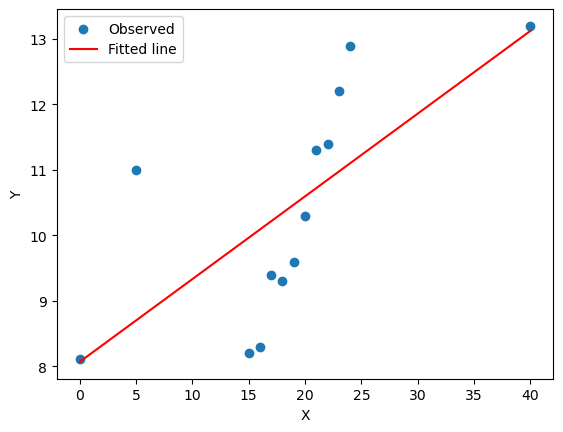

In [112]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], Y, label='Observed')
plt.plot(X[:,0], model.predict(X), color='red', label='Fitted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


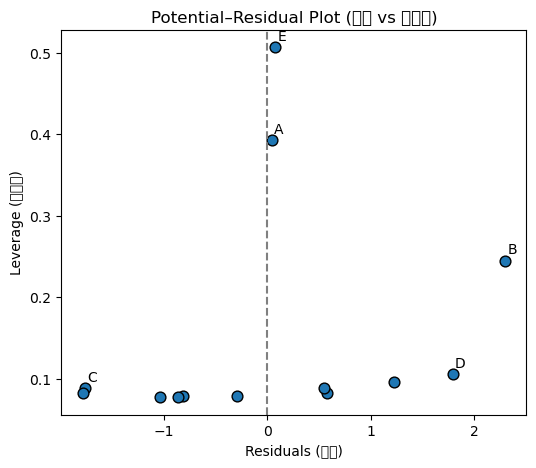

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터
X = np.array([0, 5,15,16,17,18,19,20,21,22,23,24,40])
Y = np.array([8.11, 11.00, 8.20, 8.30, 9.40, 9.30, 9.60, 10.30, 11.30, 11.40, 12.20, 12.90, 13.2])

# 회귀모형 적합
X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()

# 잔차, 지레값 계산
influence = model.get_influence()
residuals = model.resid
leverage = influence.hat_matrix_diag

# 플롯
plt.figure(figsize=(6,5))
plt.scatter(residuals, leverage, s=60, edgecolors='black')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Residuals (잔차)')
plt.ylabel('Leverage (잠재성)')
plt.title('Potential–Residual Plot (잔차 vs 잠재성)')

# 다섯 점 A~E 표시 (X=0,5,15,24,40 대응)
labels = ['A','B','C','D','E']
indices = [0,1,2,11,12]
for i, label in zip(indices, labels):
    plt.annotate(label, (residuals[i], leverage[i]),
                 textcoords="offset points", xytext=(5,5), ha='center')

plt.show()
